# **Orange Hoops Data Science Challenge**

#### **Team**: Data Wizards

**Team members**: 

1. Sagarika Shinde

2. Srushti Shobhane

3. Sejal Sardal

4. Rushikesh Shinde

### Problem Statement:

The goal is to predict the player injuries using the different attributes present in the three datasets provided.

### 1. Loading and Inspecting the Dataset

In [2]:
import pandas as pd

# Loading the datasets
player_sessions = pd.read_csv(r"C:\Users\s29sh\Downloads\player_sessions.csv",encoding='ISO-8859-1')
muscle_imbalance = pd.read_csv(r"C:\Users\s29sh\Downloads\muscle_imbalance_data.csv", encoding='ISO-8859-1')
injury_history = pd.read_csv(r"C:\Users\s29sh\Downloads\injury_history.csv", encoding='ISO-8859-1')

# Inspecting the datasets
print(player_sessions.info())
print(muscle_imbalance.info())
print(injury_history.info())

# Printing the first few rows of the data
print(player_sessions.head())
print(muscle_imbalance.head())
print(injury_history.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                2604 non-null   object 
 1   Player.ID                           2604 non-null   int64  
 2   Group.Id                            2604 non-null   int64  
 3   Group.name                          2604 non-null   object 
 4   League.ID                           2604 non-null   int64  
 5   Session.ID                          2604 non-null   int64  
 6   Session_Date                        2604 non-null   object 
 7   Position                            2604 non-null   object 
 8   Distance..mi.                       2604 non-null   float64
 9   Distance...min..mi.                 2604 non-null   float64
 10  Duration..s.                        2604 non-null   int64  
 11  Steps                               2604 no

### 2. Data Cleaning and Preprocessing

In [3]:
# Checking for missing values in each dataset if any
print(player_sessions.isnull().sum())
print(muscle_imbalance.isnull().sum())
print(injury_history.isnull().sum())

# We will convert this missing values once we merge the data.

# Converting session dates to datetime
player_sessions['Session_Date'] = pd.to_datetime(player_sessions['Session_Date'])


Name                                  0
Player.ID                             0
Group.Id                              0
Group.name                            0
League.ID                             0
Session.ID                            0
Session_Date                          0
Position                              0
Distance..mi.                         0
Distance...min..mi.                   0
Duration..s.                          0
Steps                                 0
Speed....of.max......                 0
Speed..max....mph.                    0
Speed..?ò...mph.                      0
Time..s.                              0
Accumulated.Acceleration.Load         0
Anaerobic.Activity..distance...mi.    0
Jump.Load..J.                         0
Heart.Rate..?ò...bpm.                 0
Heart.Rate..min....bpm.               0
Heart.Rate..max....bpm.               0
Human.Core.Temperature..?ò....F.      0
Human.Core.Temperature..max.....F.    0
TRIMP                                 0


### 3. Merging Datasets

In [4]:
# Merging datasets on Player.ID
merged_data = injury_history.merge(player_sessions, on='Player.ID', how='left')
merged_data = merged_data.merge(muscle_imbalance, on='Player.ID', how='left')

# Checking the merged data structure
print(merged_data.info())

# After checking the data structure we came to know that there are three separate columns created for 'Name','Player Name', and
# 'Group.Id' due to their availability in two csv files while merging. As they hold the same info we have decided to drop one of each.

# Dropping redundant columns
merged_data.drop(columns=['Name_y', 'Group.Id_y','Player Name'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44837 entries, 0 to 44836
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Player.ID                           44837 non-null  int64         
 1   Name_x                              44837 non-null  object        
 2   Group.Id_x                          44837 non-null  int64         
 3   Injury Type                         44837 non-null  object        
 4   Body Part                           44837 non-null  object        
 5   Side                                32578 non-null  object        
 6   Injury Date                         44837 non-null  object        
 7   Severity                            22763 non-null  object        
 8   Recovery Time (days)                44837 non-null  int64         
 9   Additional Notes                    44837 non-null  object        
 10  Name_y                

In [5]:
# Checking the null values in the merged data
print(merged_data.isnull().sum())

Player.ID                                 0
Name_x                                    0
Group.Id_x                                0
Injury Type                               0
Body Part                                 0
Side                                  12259
Injury Date                               0
Severity                              22074
Recovery Time (days)                      0
Additional Notes                          0
Group.name                                0
League.ID                                 0
Session.ID                                0
Session_Date                              0
Position                                  0
Distance..mi.                             0
Distance...min..mi.                       0
Duration..s.                              0
Steps                                     0
Speed....of.max......                     0
Speed..max....mph.                        0
Speed..?ò...mph.                          0
Time..s.                        

In [6]:
# Performing imputation after finding out the columns with null values.
# Imputing missing values in 'Severity' column with 'Unknown'
merged_data.fillna({'Severity':'Unknown'}, inplace=True)

# Imputing missing values in 'Side' column with 'Unknown'
merged_data.fillna({'Side':'Unknown'}, inplace=True)

# Checking if there are any remaining NA values
print(merged_data.isnull().sum())


Player.ID                             0
Name_x                                0
Group.Id_x                            0
Injury Type                           0
Body Part                             0
Side                                  0
Injury Date                           0
Severity                              0
Recovery Time (days)                  0
Additional Notes                      0
Group.name                            0
League.ID                             0
Session.ID                            0
Session_Date                          0
Position                              0
Distance..mi.                         0
Distance...min..mi.                   0
Duration..s.                          0
Steps                                 0
Speed....of.max......                 0
Speed..max....mph.                    0
Speed..?ò...mph.                      0
Time..s.                              0
Accumulated.Acceleration.Load         0
Anaerobic.Activity..distance...mi.    0


### 4. Feature Engineering

In [7]:
# Creating binary flags for missing 'Severity' and 'Side' columns
merged_data['Severity_missing'] = merged_data['Severity'] == 'Unknown'
merged_data['Side_missing'] = merged_data['Side'] == 'Unknown'

# Converting categorical columns into numeric using One-Hot Encoding to use in machine learning model later
merged_data = pd.get_dummies(merged_data, columns=['Position', 'Body Part', 'Side', 'Injury Type'], drop_first=True)

# Converting injury date to date based features
merged_data['Injury_Date'] = pd.to_datetime(merged_data['Injury Date'], errors='coerce')


In [8]:
# Since many machine learning algorithms work better when the features are scaled,
# Using StandardScaler to scale the numerical columns
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns to scale
numerical_columns = ['Distance..mi.', 'Distance...min..mi.', 'Duration..s.', 'Steps', 'Speed....of.max......',
                     'Speed..max....mph.', 'Speed..?ò...mph.', 'Time..s.', 'Accumulated.Acceleration.Load',
                     'Anaerobic.Activity..distance...mi.', 'Jump.Load..J.', 'Heart.Rate..?ò...bpm.', 
                     'Heart.Rate..min....bpm.', 'Heart.Rate..max....bpm.', 'Human.Core.Temperature..?ò....F.',
                     'Human.Core.Temperature..max.....F.', 'TRIMP', 'Jump.Height..max....ft.', 
                     'Changes.of.Orientation', 'Exertions', 'Disk.Usage....', 'HamstringImbalance Percent', 
                     'Calf Imbalance Percent', 'Groin Imbalance Percent']

scaler = StandardScaler()
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

In [9]:
from sklearn.model_selection import train_test_split


# Using ordinal encoding for 'Severity' as it has values like 'Grade 1', 'Grade 2', 'Grade 3' which defines the severity of injury.
severity_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Unknown': 0}
merged_data['Severity'] = merged_data['Severity'].map(severity_mapping)

# Also, since we saw two features duration and distance which can be used to get an idea on how long a player takes to cover a certain distance, we are creating a new feature.
merged_data['Duration_per_mile'] = merged_data['Duration..s.'] / merged_data['Distance..mi.']

# Creating a binary target variable for injury occurrence since the goal is to predict the player injuries
injury_columns = [col for col in merged_data.columns if 'Injury Type_' in col]
merged_data['Injury_Flag'] = merged_data[injury_columns].max(axis=1)

# Defining features and target variable
X = merged_data.drop(columns=['Player.ID', 'Name_x', 'Injury Date', 'Severity', 
                              'Recovery Time (days)', 'Additional Notes', 'Group.name',
                              'Hamstring To Quad Ratio','Side_missing','Severity_missing',
                              'Disk.Usage....','Exertions','Duration..s.',
                              'Session.ID', 'Session_Date', 'League.ID', 'Session ID', 
                              'Date Recorded', 'Injury Type_Dislocation', 
                              'Injury Type_Fracture', 'Injury Type_Muscle Strain', 
                              'Injury Type_Pain', 'Injury Type_Soreness', 
                              'Injury Type_Sprain', 'Injury Type_Strain', 
                              'Injury Type_Tendonitis', 'Injury_Date','Group.Id_x'])

y = merged_data[['Injury Type_Dislocation', 'Injury Type_Fracture',
       'Injury Type_Muscle Strain', 'Injury Type_Pain', 'Injury Type_Soreness',
       'Injury Type_Sprain', 'Injury Type_Strain', 'Injury Type_Tendonitis']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Model Selection and Training

In [10]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Using GradientBoostingClassifier as a model
rf_model = GradientBoostingClassifier(random_state=42)

# Wrapping with MultiOutputClassifier for multi-label
multi_output_model = MultiOutputClassifier(rf_model, n_jobs=-1)

# Training the model
multi_output_model.fit(X_train, y_train)

# Making the predictions
y_pred = multi_output_model.predict(X_test)


In [11]:
# Importing evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

# Making the predictions
y_pred = multi_output_model.predict(X_test)

# Evaluating the model using classification report for multi-label classification
print(classification_report(y_test, y_pred, zero_division= 0))

# Getting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       0.85      0.88      0.86      1041
           2       1.00      1.00      1.00       961
           3       0.27      0.24      0.26       218
           4       0.31      0.30      0.30       516
           5       1.00      1.00      1.00      1017
           6       1.00      1.00      1.00      1137
           7       0.85      0.83      0.84      2106

   micro avg       0.87      0.87      0.87      7568
   macro avg       0.78      0.78      0.78      7568
weighted avg       0.87      0.87      0.87      7568
 samples avg       0.73      0.73      0.73      7568

Accuracy: 0.8778991971454059


#### We tried using different classifiers to achieve the best accuracy possible, and after trying a few classifiers like Random Forest, Logistic Regression, SVM, KNN, and Gradient Boosting we finally chose Gradient Boosting as it showed strong recall and f-1 scores across labels. Also, because of its predictive power and adaptibility.

In [12]:
from sklearn.model_selection import cross_val_score

# Using cross-validation for model evaluation
cv_scores = cross_val_score(multi_output_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.89266797 0.89113465 0.88597714 0.89280736 0.89279242]
Average cross-validation score: 0.8910759072321162


#### After the cross-validation process we are almost achieving the **accuracy of 0.90** which was the designated goal of this competition. 

<Axes: title={'center': 'Injury Type Distribution in Training Set'}>

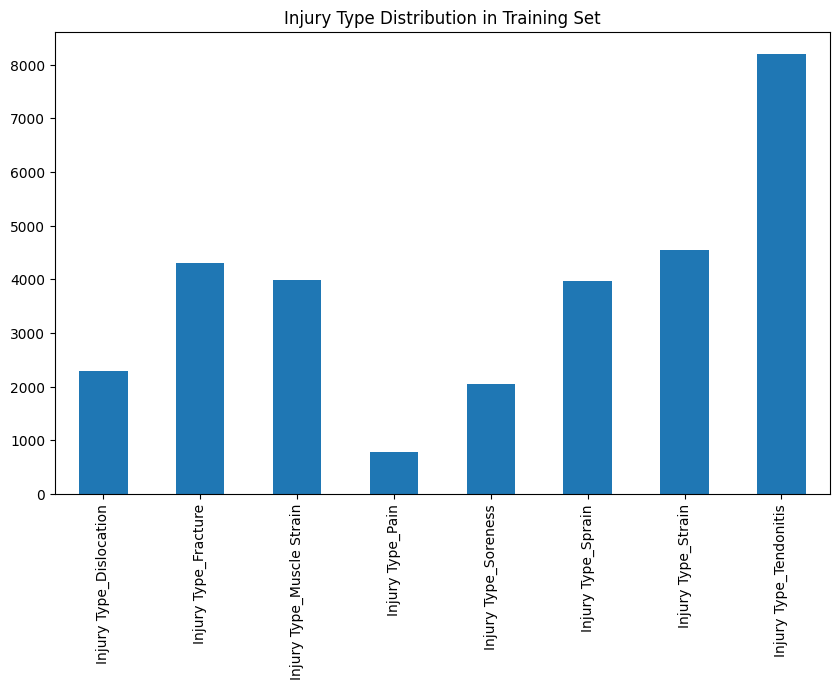

In [13]:
# Checking the distribution of injury types in the training set to know which injury type occurs the most
y_train.sum().plot(kind='bar', title='Injury Type Distribution in Training Set', figsize=(10, 6))


##### We can see here that the **Tendonitis** is the type of injury that appears the most of the time and hence we can take preventive measures to not let that happen. Also, we will see next what feature causes all this injuries. 

### 6. Feature Importance

Top features impacting Injury Type_Dislocation:
Body Part_Knee: 0.4233
Quad Imbalance Percent: 0.1977
Groin Imbalance Percent: 0.1460
Calf Imbalance Percent: 0.1000
Position_Guard: 0.0859
HamstringImbalance Percent: 0.0472
Anaerobic.Activity..distance...mi.: 0.0000
Speed....of.max......: 0.0000
Human.Core.Temperature..?ò....F.: 0.0000
Jump.Height..max....ft.: 0.0000


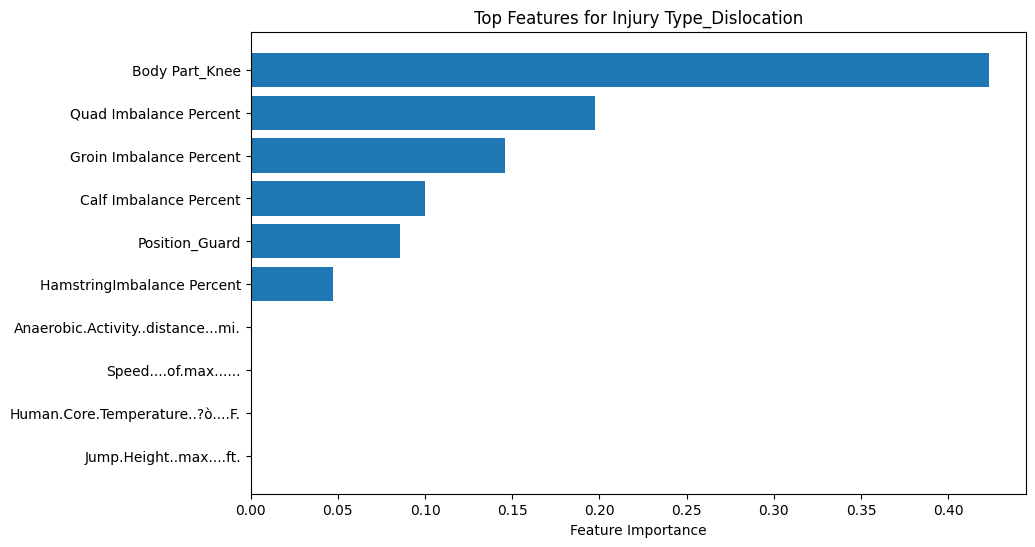

Top features impacting Injury Type_Fracture:
Side_Right: 0.2696
Position_Forward: 0.1806
Body Part_Wrist: 0.1696
Groin Imbalance Percent: 0.1120
Position_Guard: 0.0852
Calf Imbalance Percent: 0.0845
Quad Imbalance Percent: 0.0840
HamstringImbalance Percent: 0.0115
Injury_Flag: 0.0012
Body Part_Foot: 0.0007


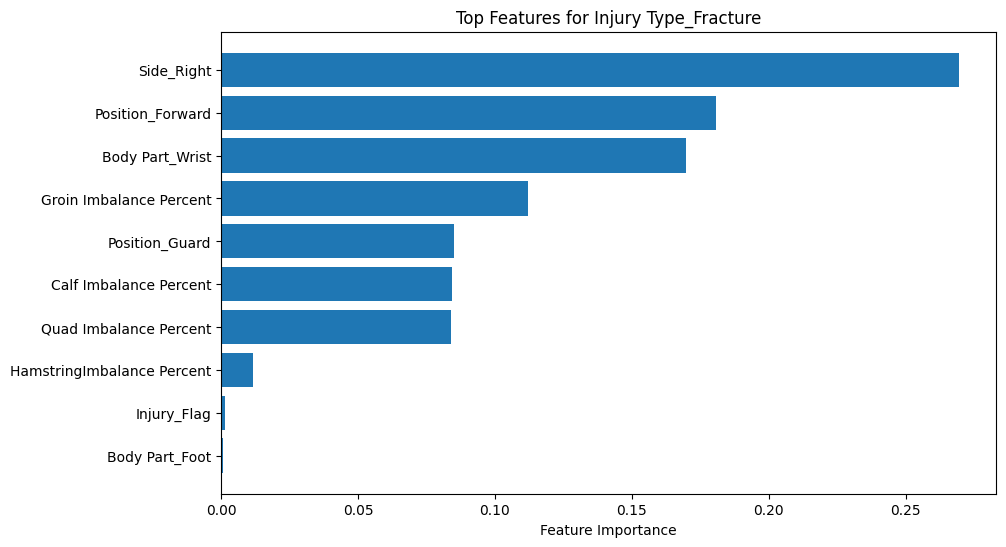

Top features impacting Injury Type_Muscle Strain:
Body Part_Quadriceps: 1.0000
Distance..mi.: 0.0000
Speed....of.max......: 0.0000
Speed..?ò...mph.: 0.0000
Heart.Rate..max....bpm.: 0.0000
Accumulated.Acceleration.Load: 0.0000
Steps: 0.0000
Human.Core.Temperature..max.....F.: 0.0000
Quad Imbalance Percent: 0.0000
TRIMP: 0.0000


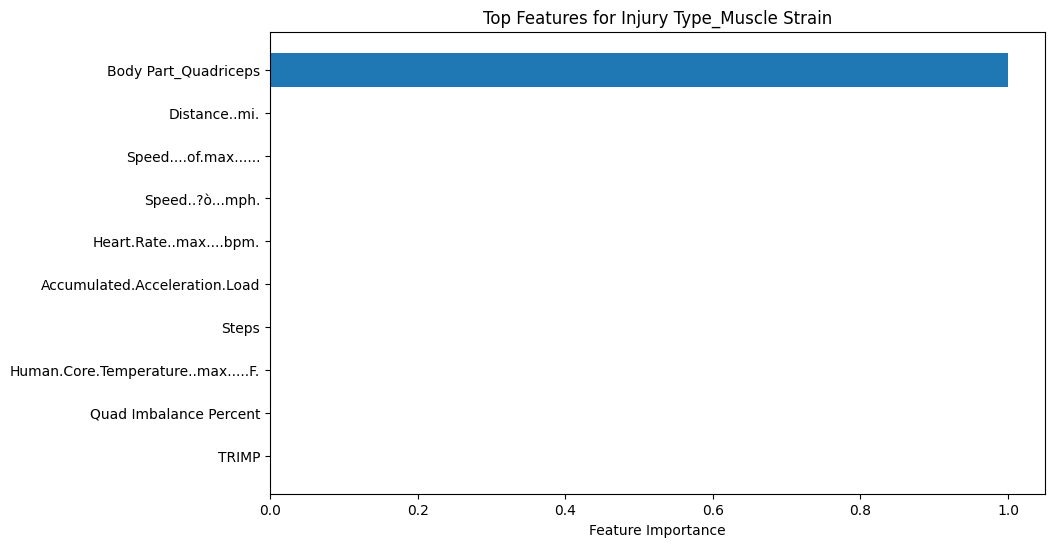

Top features impacting Injury Type_Pain:
Body Part_Foot: 0.9646
HamstringImbalance Percent: 0.0073
Groin Imbalance Percent: 0.0064
Quad Imbalance Percent: 0.0051
Calf Imbalance Percent: 0.0046
Duration_per_mile: 0.0023
Accumulated.Acceleration.Load: 0.0014
Time..s.: 0.0012
Heart.Rate..max....bpm.: 0.0009
Steps: 0.0008


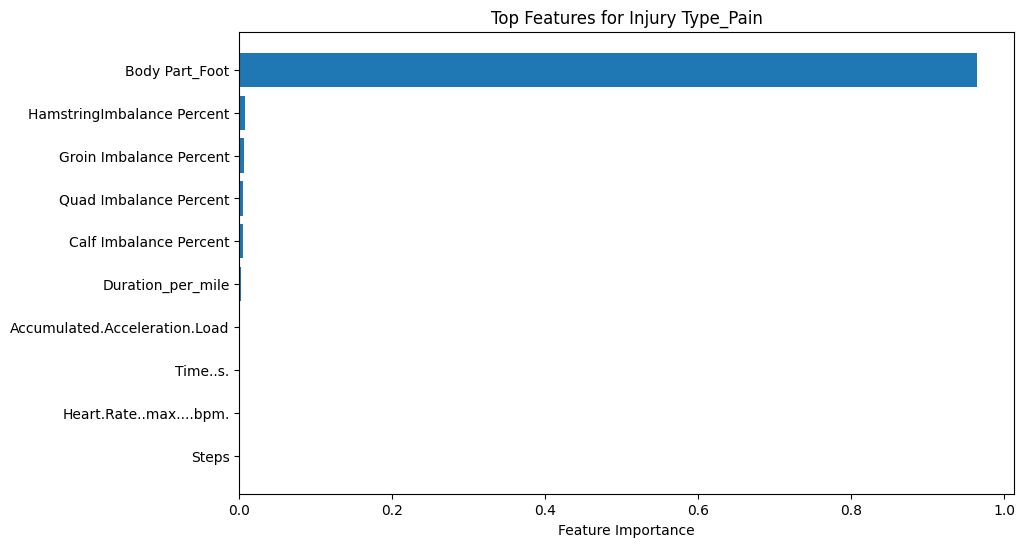

Top features impacting Injury Type_Soreness:
Body Part_Lower Back: 0.9880
Quad Imbalance Percent: 0.0016
Groin Imbalance Percent: 0.0015
HamstringImbalance Percent: 0.0010
Calf Imbalance Percent: 0.0009
Jump.Height..max....ft.: 0.0008
Distance..mi.: 0.0007
Human.Core.Temperature..max.....F.: 0.0006
TRIMP: 0.0006
Time..s.: 0.0006


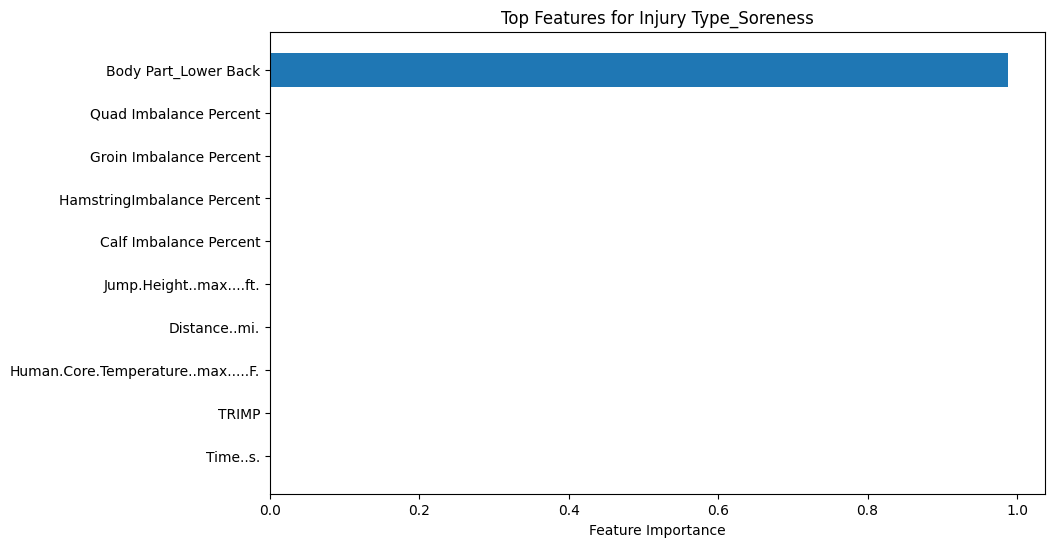

Top features impacting Injury Type_Sprain:
Body Part_Knee: 0.4178
Groin Imbalance Percent: 0.2158
Quad Imbalance Percent: 0.1745
Calf Imbalance Percent: 0.0982
HamstringImbalance Percent: 0.0936
Speed..max....mph.: 0.0000
Heart.Rate..?ò...bpm.: 0.0000
Jump.Height..max....ft.: 0.0000
Speed....of.max......: 0.0000
Duration_per_mile: 0.0000


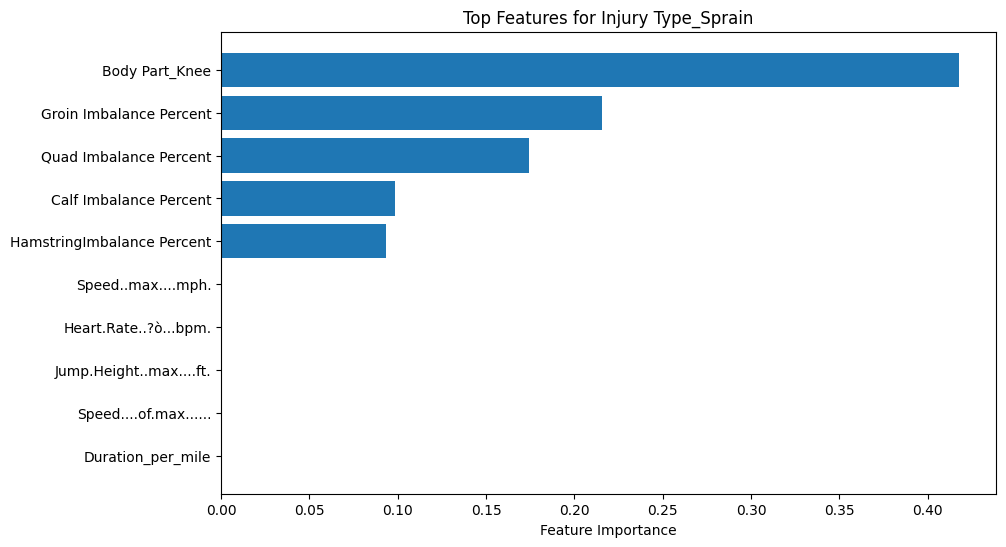

Top features impacting Injury Type_Strain:
Body Part_Groin: 0.3412
Body Part_Hamstring: 0.2031
Groin Imbalance Percent: 0.1438
Body Part_Knee: 0.1279
Quad Imbalance Percent: 0.0881
HamstringImbalance Percent: 0.0683
Calf Imbalance Percent: 0.0275
Changes.of.Orientation: 0.0000
Human.Core.Temperature..?ò....F.: 0.0000
Time..s.: 0.0000


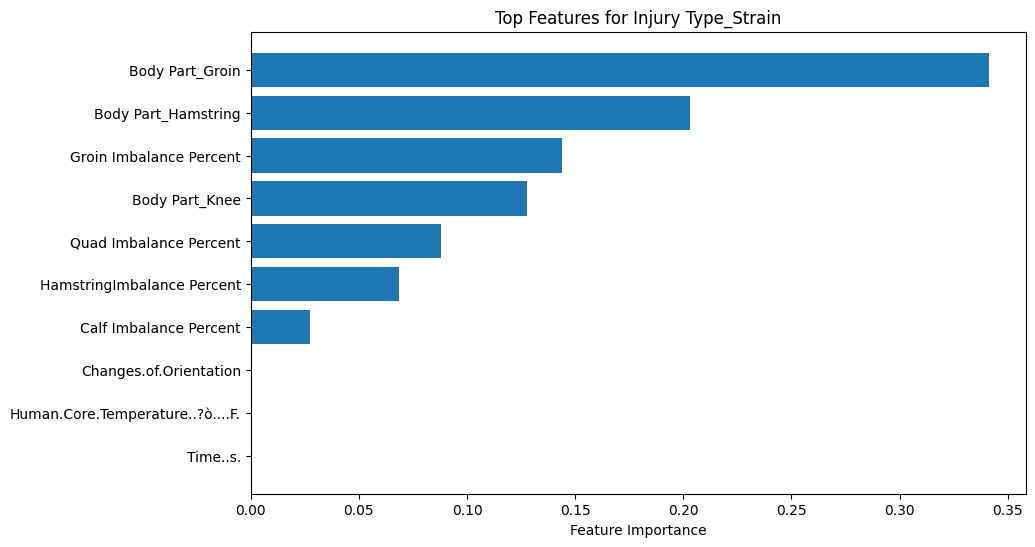

Top features impacting Injury Type_Tendonitis:
Body Part_Shoulder: 0.5313
Body Part_Lower Back: 0.1659
Body Part_Wrist: 0.1294
Position_Guard: 0.0942
Position_Forward: 0.0516
Calf Imbalance Percent: 0.0198
HamstringImbalance Percent: 0.0042
Quad Imbalance Percent: 0.0028
Time..s.: 0.0001
Groin Imbalance Percent: 0.0001


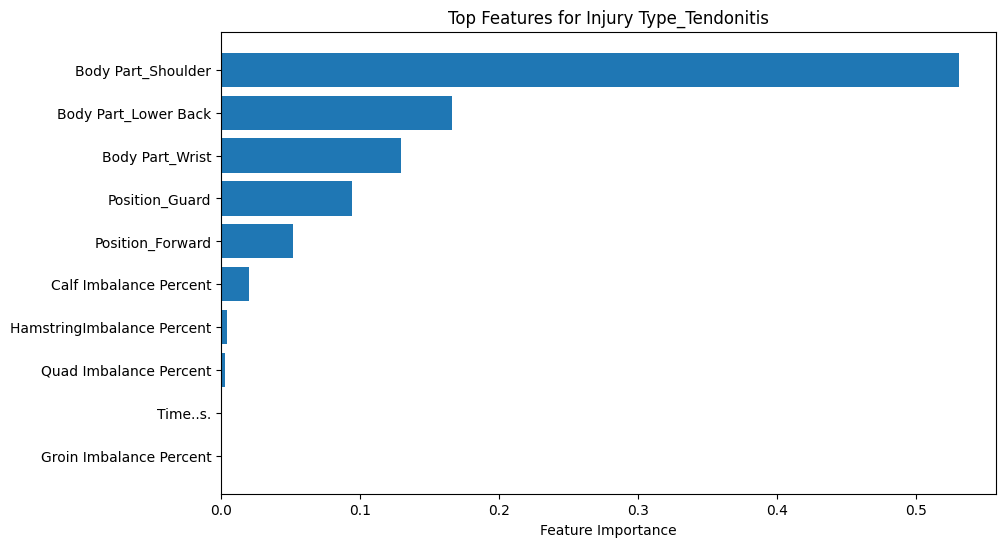

In [14]:
# Getting feature importance values so as to make changes in the training data to improve accuracy.
import numpy as np
import matplotlib.pyplot as plt

# Extracting feature importances for each injury type model
for i, label in enumerate(y.columns):
    # Getting feature importances from the underlying GradientBoostingClassifier for each label
    feature_importances = multi_output_model.estimators_[i].feature_importances_
    
    # Pairing feature names with their importance values
    feature_importance_pairs = list(zip(X.columns, feature_importances))
    # Sorting features by importance in descending order
    sorted_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
    
    # Displaying the top 10 features impacting each injury type
    print(f"Top features impacting {label}:")
    for feature, importance in sorted_importances[:10]:
        print(f"{feature}: {importance:.4f}")
    
    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.barh([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
    plt.xlabel("Feature Importance")
    plt.title(f"Top Features for {label}")
    plt.gca().invert_yaxis()
    plt.show()


### Insights:

##### As from the visualizations above we can see that which are the major factors leading to a particular injury or which are the body parts causing the injury. This helps us predict the future injuries of the players if they are suffering from any pain from the certain parts of the body, and with the help of this analysis we can understand what injury the player might get affected by later which can change the result of the game too. So, it becomes one of the key predictions as per the goal of this problem.


### 7. Conclusion

##### With the accuracy of almost 88% and 90% with the cross-validation, we can say that our model predicts the test data correctly based on the training data. From what we understood of the goal was that we had to find out the most repetitive injury type causing the injuries which was "Disloacation", that we conveyed through the bar graph. And not only that but we also figured out the features that are causing those injuries, that are the root to those injuries which will help in future to understand which player might face which injury and what care should be taken. It will also help in making decisions like team selection as the injury forces a substitution and that also changes the course of the game.